<a href="https://www.kaggle.com/code/game1g/taiwan-antidepressant-usage?scriptVersionId=224016976" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 主要功能：

- 自動化資料擷取
- 標準化資料處理
- 自動統計分析
- 自動生成報告
- 記錄檔管理
- 錯誤處理

# **1. 定期下載與更新 CSV 資料**
使用 `requests` 下載 CSV 檔案：

In [13]:
import pandas as pd
import requests

# API 連結
API_URL = "https://info.nhi.gov.tw/api/iode0000s01/Dataset?rId=A21030000I-L50007-001"
LOCAL_CSV_FILE = "antidepressant_usage.csv"

# 方式 1：直接從 API 讀取 CSV
def read_from_api():
    df = pd.read_csv(API_URL, encoding="utf-8")
    print("📡 已從 API 讀取最新資料")
    return df

# 方式 2：下載 CSV 並存檔，再讀取
def download_and_read():
    response = requests.get(API_URL)
    with open(LOCAL_CSV_FILE, "wb") as file:
        file.write(response.content)
    print(f"💾 已下載並存為 {LOCAL_CSV_FILE}")
    
    df = pd.read_csv(LOCAL_CSV_FILE, encoding="utf-8")
    return df

# 測試兩種方法
df_api = read_from_api()
print(df_api.head())  # 顯示 API 讀取的資料

df_local = download_and_read()
print(df_local.head())  # 顯示本地存檔後的資料


📡 已從 API 讀取最新資料
   年別  抗憂鬱藥物使用人數    性別＿男    性別＿女  年齡別＿30歲以下  年齡別＿31－40歲  年齡別＿41－50歲  \
0  94     791224  338709  452515     124063      114808      149683   
1  95     791932  337890  454042     113421      111495      150628   
2  96     812279  342728  469551     109130      113153      154526   
3  97     846317  356255  490062     108665      117088      161430   
4  98     874930  366268  508662     106507      119162      166298   

   年齡別＿51－65歲  年齡別＿65歲以上   臺北業務組  ...  中區業務組＿南投縣  南區業務組＿臺南市  南區業務組＿嘉義市  \
0      194363     208307  253436  ...          …          …          …   
1      200548     215840  259669  ...          …          …          …   
2      211550     223920  266505  ...          …          …          …   
3      224669     234465  278453  ...          …          …          …   
4      238197     244766  289098  ...          …          …          …   

   南區業務組＿雲林縣  南區業務組＿嘉義縣 高屏業務組＿高雄市 高屏業務組＿屏東縣 高屏業務組＿澎湖縣 東區業務組＿花蓮縣 東區業務組＿臺東縣  
0          …          …         …   


---

# **2. 資料整理與清理**
讀取 CSV 並處理遺漏值、轉換格式等：

In [14]:
import pandas as pd

# 方法 1：從 API 直接讀取 CSV
API_URL = "https://info.nhi.gov.tw/api/iode0000s01/Dataset?rId=A21030000I-L50007-001"
df = pd.read_csv(API_URL, encoding="utf-8")

# 或 方法 2：從本地檔案讀取
# df = pd.read_csv("antidepressant_usage.csv", encoding="utf-8")

print(df.head())  # 確認資料是否讀取成功


   年別  抗憂鬱藥物使用人數    性別＿男    性別＿女  年齡別＿30歲以下  年齡別＿31－40歲  年齡別＿41－50歲  \
0  94     791224  338709  452515     124063      114808      149683   
1  95     791932  337890  454042     113421      111495      150628   
2  96     812279  342728  469551     109130      113153      154526   
3  97     846317  356255  490062     108665      117088      161430   
4  98     874930  366268  508662     106507      119162      166298   

   年齡別＿51－65歲  年齡別＿65歲以上   臺北業務組  ...  中區業務組＿南投縣  南區業務組＿臺南市  南區業務組＿嘉義市  \
0      194363     208307  253436  ...          …          …          …   
1      200548     215840  259669  ...          …          …          …   
2      211550     223920  266505  ...          …          …          …   
3      224669     234465  278453  ...          …          …          …   
4      238197     244766  289098  ...          …          …          …   

   南區業務組＿雲林縣  南區業務組＿嘉義縣 高屏業務組＿高雄市 高屏業務組＿屏東縣 高屏業務組＿澎湖縣 東區業務組＿花蓮縣 東區業務組＿臺東縣  
0          …          …         …         …         

In [15]:
# 檢查缺失值
print(df.isnull().sum())

# 重新命名欄位以避免亂碼
df = df.rename(columns=lambda x: x.strip().replace("＿", "_"))

# 轉換年別為西元年
df["年別"] = (df["年別"] + 1911).astype(int)

# 轉換性別數據格式
df["性別_男"] = df["性別_男"].astype(int)
df["性別_女"] = df["性別_女"].astype(int)

# 移除不必要的行政區欄位
drop_columns = [col for col in df.columns if "業務組" in col]
df_cleaned = df.drop(columns=drop_columns)

print("✅ 資料清理完成")


年別            0
抗憂鬱藥物使用人數     0
性別＿男          0
性別＿女          0
年齡別＿30歲以下     0
年齡別＿31－40歲    0
年齡別＿41－50歲    0
年齡別＿51－65歲    0
年齡別＿65歲以上     0
臺北業務組         0
北區業務組         0
中區業務組         0
南區業務組         0
高屏業務組         0
東區業務組         0
臺北業務組＿新北市     0
臺北業務組＿臺北市     0
臺北業務組＿基隆市     0
臺北業務組＿宜蘭縣     0
臺北業務組＿金門縣     0
臺北業務組＿連江縣     0
北區業務組＿桃園市     0
北區業務組＿新竹市     0
北區業務組＿新竹縣     0
北區業務組＿苗栗縣     0
中區業務組＿臺中市     0
中區業務組＿彰化縣     0
中區業務組＿南投縣     0
南區業務組＿臺南市     0
南區業務組＿嘉義市     0
南區業務組＿雲林縣     0
南區業務組＿嘉義縣     0
高屏業務組＿高雄市     0
高屏業務組＿屏東縣     0
高屏業務組＿澎湖縣     0
東區業務組＿花蓮縣     0
東區業務組＿臺東縣     0
dtype: int64
✅ 資料清理完成




---

# **3. 統計分析**


基本統計資訊:
                 年別     抗憂鬱藥物使用人數           性別_男          性別_女      年齡別_30歲以下  \
count    19.000000  1.900000e+01      19.000000  1.900000e+01      19.000000   
mean   2014.000000  1.159911e+06  477134.684211  6.827765e+05  136628.736842   
std       5.627314  2.987285e+05  111965.027099  1.868507e+05   40056.722300   
min    2005.000000  7.912240e+05  337890.000000  4.525150e+05  103904.000000   
25%    2009.500000  8.892495e+05  373320.500000  5.159290e+05  108897.500000   
50%    2014.000000  1.165942e+06  484237.000000  6.817050e+05  115740.000000   
75%    2018.500000  1.363700e+06  554023.500000  8.096770e+05  152713.000000   
max    2023.000000  1.712222e+06  685141.000000  1.027081e+06  221426.000000   

          年齡別_31－40歲     年齡別_41－50歲     年齡別_51－65歲      年齡別_65歲以上  
count      19.000000      19.000000      19.000000      19.000000  
mean   145971.894737  198540.578947  338556.736842  340213.263158  
std     25043.904266   36561.022562   97586.009137  106996.095619 

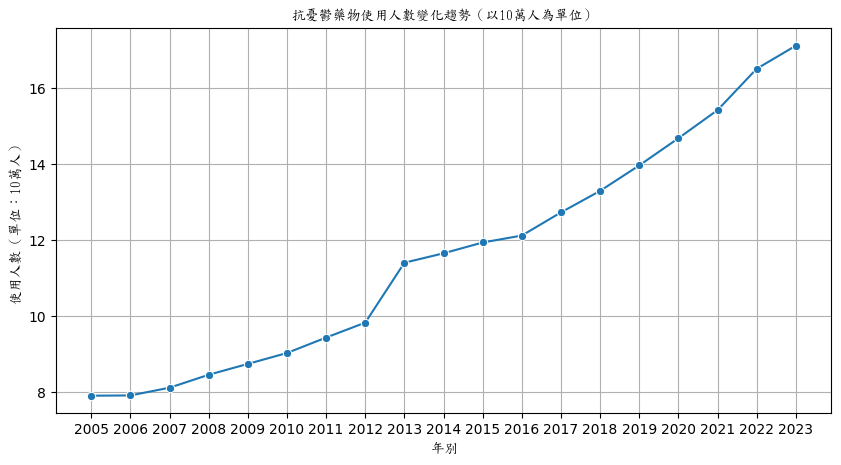

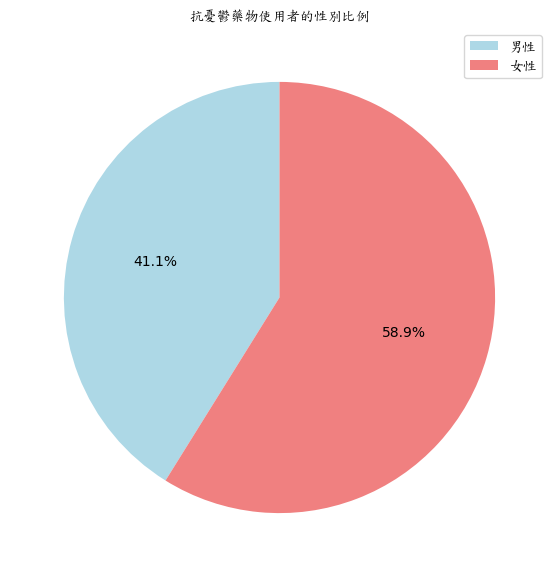

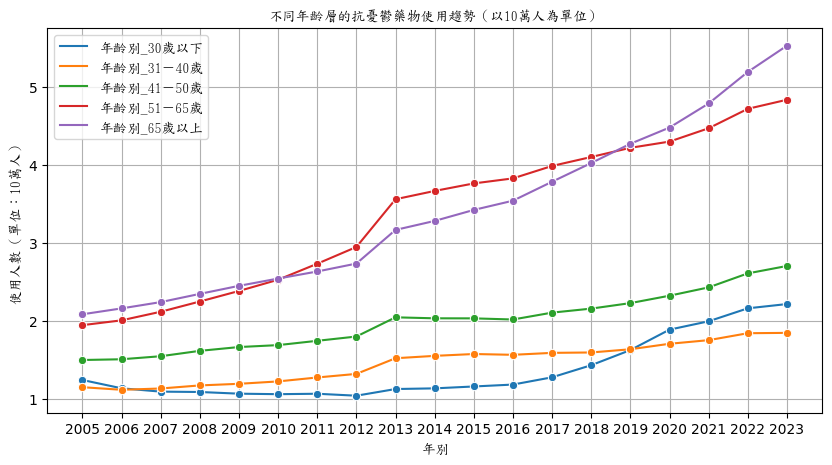

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 設定字型
font = FontProperties(fname='/kaggle/input/fontchinese/Open_Data/Fonts/TW-Kai-98_1.ttf')
 
# 確保 matplotlib 使用正確的字型並支援負號顯示
rcParams['font.family'] = font.get_name()  # 設定字型為 Noto Sans TC
rcParams['axes.unicode_minus'] = False  # 設定避免負號顯示為方塊

# 1️ 資料概覽與統計
print("基本統計資訊:\n", df_cleaned.describe())
print("\n資料型態:\n", df_cleaned.dtypes)

# 2️ 趨勢分析（抗憂鬱藥物使用人數隨時間變化）
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="年別", y=df_cleaned["抗憂鬱藥物使用人數"] / 100000, marker="o")  # 除以100,000
plt.xticks(df_cleaned["年別"].unique())  # 顯示所有年份
plt.title("抗憂鬱藥物使用人數變化趨勢（以10萬人為單位）", fontproperties=font)
plt.xlabel("年別", fontproperties=font)
plt.ylabel("使用人數（單位：10萬人）", fontproperties=font)
plt.grid()
plt.show()

# 3️ 性別比例分析
plt.figure(figsize=(7, 7))
labels = ["男性", "女性"]
sizes = [df_cleaned["性別_男"].sum() / 100000, df_cleaned["性別_女"].sum() / 100000]  # 除以100,000
colors = ["lightblue", "lightcoral"]
plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=90)
# 設定圖例顯示中文字
plt.legend(labels=labels, prop=font)
plt.title("抗憂鬱藥物使用者的性別比例", fontproperties=font)
plt.show()

# 4️ 年齡層分析
age_groups = ["年齡別_30歲以下", "年齡別_31－40歲", "年齡別_41－50歲", "年齡別_51－65歲", "年齡別_65歲以上"]
df_age = df_cleaned.melt(id_vars=["年別"], value_vars=age_groups, var_name="年齡層", value_name="使用人數")
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_age, x="年別", y=df_age["使用人數"] / 100000, hue="年齡層", marker="o")  # 除以100,000
plt.xticks(df_cleaned["年別"].unique())  # 顯示所有年份
plt.title("不同年齡層的抗憂鬱藥物使用趨勢（以10萬人為單位）", fontproperties=font)
plt.xlabel("年別", fontproperties=font)
plt.ylabel("使用人數（單位：10萬人）", fontproperties=font)
plt.legend(prop=font)
plt.grid()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 假設要預測"抗憂鬱藥物使用人數"
X = df_cleaned[["性別_男", "性別_女", "年齡別_30歲以下", "年齡別_31－40歲", "年齡別_41－50歲", "年齡別_51－65歲", "年齡別_65歲以上"]]
y = df_cleaned["抗憂鬱藥物使用人數"]

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立隨機森林回歸模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測與評估
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"平均絕對誤差: {mae}")


平均絕對誤差: 50839.785


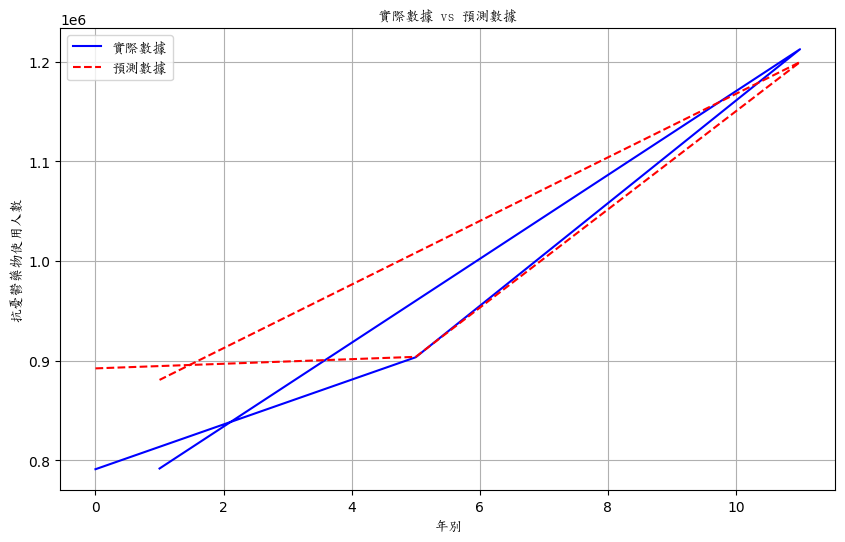

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='實際數據', color='blue')
plt.plot(y_test.index, y_pred, label='預測數據', color='red', linestyle='--')
plt.xlabel("年別", fontproperties=font)
plt.ylabel("抗憂鬱藥物使用人數", fontproperties=font)
plt.title("實際數據 vs 預測數據", fontproperties=font)
plt.legend(prop=font)
plt.grid(True)
plt.show()



---

# **4. 製作結果表格**
將統計結果存為 CSV 或 Excel，方便查閱：


In [19]:
# 1️ 資料概覽與統計結果
statistics_df = df_cleaned.describe()

# 儲存為 CSV 文件
statistics_df.to_csv('statistics_result.csv', encoding='utf-8')

print("已儲存為CSV檔：'statistics_result.csv'")


已儲存為CSV檔：'statistics_result.csv'


In [20]:
# 1️ 資料概覽與統計結果
statistics_df = df_cleaned.describe()

# 儲存為 Excel 文件
statistics_df.to_excel('statistics_result.xlsx')

print("已儲存為Excel檔：'statistics_result.xlsx'")


已儲存為Excel檔：'statistics_result.xlsx'


In [21]:
import pandas as pd

# 這些是分析結果
statistics_df = df_cleaned.describe()
gender_data = pd.DataFrame({
    "性別": labels,
    "使用人數（單位：10萬人）": sizes
})
age_group_data = df_age.groupby(["年別", "年齡層"]).sum().reset_index()

# 儲存為 CSV 文件
statistics_df.to_csv('statistics_result.csv', encoding='utf-8')
gender_data.to_csv('gender_analysis.csv', encoding='utf-8')
age_group_data.to_csv('age_group_analysis.csv', encoding='utf-8')

# 儲存為 Excel 文件
with pd.ExcelWriter('full_analysis_result.xlsx') as writer:
    statistics_df.to_excel(writer, sheet_name='統計資訊', index=True)
    gender_data.to_excel(writer, sheet_name='性別比例', index=False)
    age_group_data.to_excel(writer, sheet_name='年齡層分析', index=False)
print("已成功儲存 Excel 檔：full_analysis_result.xlsx")


已成功儲存 Excel 檔：full_analysis_result.xlsx



---

# **5. 自動化執行**
使用 `schedule` 讓腳本每天定時運行：

In [22]:
!pip install --user schedule


In [ ]:
import schedule
import time
import pandas as pd
import requests

# API 連結
API_URL = "https://info.nhi.gov.tw/api/iode0000s01/Dataset?rId=A21030000I-L50007-001"
LOCAL_CSV_FILE = "antidepressant_usage.csv"

# 方式 1：直接從 API 讀取 CSV
def read_from_api():
    df = pd.read_csv(API_URL, encoding="utf-8")
    print("📡 已從 API 讀取最新資料")
    return df

# 方式 2：下載 CSV 並存檔，再讀取
def download_and_read():
    response = requests.get(API_URL)
    with open(LOCAL_CSV_FILE, "wb") as file:
        file.write(response.content)
    print(f"💾 已下載並存為 {LOCAL_CSV_FILE}")
    
    df = pd.read_csv(LOCAL_CSV_FILE, encoding="utf-8")
    return df

def process_data():
    """ 定期執行數據處理 """
    print("開始執行定期更新...")

    # 這裡可以選擇用哪種方式來獲取數據，這裡使用方式 1：直接從 API 讀取
    df = read_from_api()  # 或者使用 download_and_read()

    # 數據處理部分
    df.fillna(0, inplace=True)
    
    # 計算統計數據
    age_stats = df.groupby("年齡別")["抗憂鬱藥物使用人數"].mean()
    gender_stats = df.groupby("性別")["抗憂鬱藥物使用人數"].mean()
    region_stats = df.groupby("地區")["抗憂鬱藥物使用人數"].sum().sort_values(ascending=False)

    # 儲存為 Excel（多工作表）
    with pd.ExcelWriter("analysis_results.xlsx") as writer:
        age_stats.to_frame().to_excel(writer, sheet_name="年齡統計")
        gender_stats.to_frame().to_excel(writer, sheet_name="性別統計")
        region_stats.to_frame().to_excel(writer, sheet_name="地區統計")

    # 儲存為單一 CSV（合併所有統計數據）
    combined_stats = pd.concat([
        age_stats.to_frame(name="年齡統計"),
        gender_stats.to_frame(name="性別統計"),
        region_stats.to_frame(name="地區統計")
    ], axis=1)
    combined_stats.to_csv("analysis_results.csv", encoding="utf-8", index=True)

    # 儲存為多個 CSV（分開儲存不同統計數據）
    age_stats.to_csv("age_stats.csv", encoding="utf-8", index=True)
    gender_stats.to_csv("gender_stats.csv", encoding="utf-8", index=True)
    region_stats.to_csv("region_stats.csv", encoding="utf-8", index=True)

    print("更新完成！Excel、單一 CSV 和多個 CSV 已儲存。")

# 設定每天 10:00 自動執行
schedule.every().day.at("10:00").do(process_data)

while True:
    schedule.run_pending()
    time.sleep(1)



---

# **結論**
這個腳本可以：
1. **定期下載最新的 CSV 資料**
2. **清理與處理數據**
3. **計算年齡、性別、地區的統計數據**
4. **將結果輸出為 Excel 或 CSV**
5. **每天自動運行**